# Série 3

Dans cette série on verra quelques fonctions de chiffrage. On va commencer avec les plus simples pour passer aux chiffrages utilisés de nos jours.

# Exercice 2

Une application très célèbre dans les cercles de nerds informatiques est le [ECB Penguin](https://blog.filippo.io/the-ecb-penguin/) qui tient son nom du mode opératoire ECB (Electronic CodeBook), qui est très insécure sous certaines conditions.

## 1. Connaissance

La première partie montre comment charger une image et le convertir en un objet `bytes`. Cette conversion est importante, parce que normalement les images sont entregistrées d'une manière compressée avec des informations supplémentaires nécessaire à la décompression.

Une fois que l'image est dans une version décompressée avec 3 bytes par pixel (rouge, vert, bleu), il faut s'assurer que la taille totale soit un multiple de 16. Ceci est dû au chiffrage ECB, qui fonctionne en mode block de 16 bytes.

Maintenant on peut appliquer le chiffrage DES/ECB. DES indique ici le chiffrage de chaque block, tandis que ECB indique le mode d'opération.

Vous pouvez lancer ce premier block plusieurs fois et voir comment l'image est chaque fois chiffrée différemment. C'est normal, vu que ça dépend de la clé utilisée. Et celle-ci est initialisée d'une manière aléatoire.

## 2. Compréhension

Vu que le DES est trop vieux et ne devrait plus être utilisé, on va essayer avec AES. Copier les lignes depuis la 1ère partire pour faire apparaître un pinguin DES/ECB suivi d'un pinguin AES/ECB.

Maintenant comparez les deux.
- Quelle est la plus grande différence? Et comment pouvez-vous l'expliquer?

Après ajoutez le troisième pinguin, cette fois-ci en utilisant le chiffrage ChaCha20. Cette fois-ci on ne reconnaît plus du tout le pinguin. C'est triste, mais plus sécure!

## 3. Application

Le problème de l'apparition du pinguin n'est pas le DES ou le AES, mais le mode d'opération ECB. En regardant sur le site de [PyCryptoDome](https://www.pycryptodome.org/en/latest/src/cipher/aes.html) vous pouvez voir les différents modes de AES. Testez les différents modes en changeant la fonction image_AES et regardez les différents résultats.



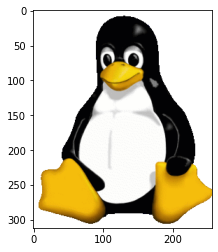

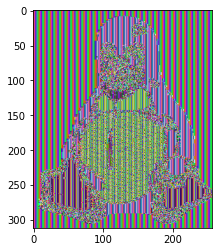

In [5]:
# Exercice 1 - Partie 1
from matplotlib.pyplot import figure, imshow
from Crypto.Cipher import AES, DES, ChaCha20
from Crypto.Random import get_random_bytes
import PIL.Image
import secrets

def image_DES(img: bytes) -> PIL.Image:
    key = get_random_bytes(8)
    cipher = DES.new(key, DES.MODE_ECB)
    encrypted = cipher.encrypt(img)
    return PIL.Image.frombytes("RGB", (256, 312), encrypted)

image_tux = PIL.Image.open("./tux.png").crop((0, 0, 256, 312))

imshow(image_tux)
figure()
imshow(image_DES(image_tux.tobytes()))

In [6]:
# Exercice 1 - Partie 2

def image_AES(img: bytes) -> PIL.Image:
    key = get_random_bytes(16)
    cipher = AES.new(key, AES.MODE_ECB)
    encrypted = cipher.encrypt(img)
    return PIL.Image.frombytes("RGB", (256, 312), encrypted)

def image_ChaCha20(img: bytes) -> PIL.Image:
    key = get_random_bytes(32)
    cipher = ChaCha20.new(key=key)
    encrypted = cipher.encrypt(img)
    return PIL.Image.frombytes("RGB", (256, 312), encrypted)


In [7]:
# Exercice 1 - Partie 3